In [2]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 5.4 MB/s eta 0:00:00


In [259]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.image import imread
import pandas as pd
from pathlib import Path
import cv2
from numpy import array
import sympy as smp

In [275]:
frames = []

path = "E:\Math_494\Assignments\monte_carlo_low.mp4"
cap = cv2.VideoCapture(path)
ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W)
    if ret:
        frames.append(img)
video = np.stack(frames, axis=0) # dimensions (T, H, W)
video.shape

(379, 540, 960, 3)

In [276]:
## covert color into gray
gray=np.mean(video,-1) 
gray.shape

(379, 540, 960)

In [278]:
## transpose the matrix in terms of 379 Columns and 518400 rows
rvideo = (np.reshape(gray,(379,518400))).transpose() 
rvideo.shape

(518400, 379)

In [279]:
## Construct initial Matrix
x=rvideo[:,:378] ## x (n-1) Matrix
Y=rvideo[:,1:379]  ## x Matrix
x.shape
Y.shape

(518400, 378)

In [280]:
## Use SVD Convert X to X'
U,S,VT = np.linalg.svd(x,full_matrices=False)
S.shape

(378,)

In [281]:
S = np.diag(S)

In [95]:
np.trace((S[0:175,0:175])**2)/np.trace(S**2)

0.9999978605903279

In [96]:
## Find svd truncation 
sum=np.trace(S)
np.trace(S[0:175,0:175]/sum)

0.991905003502707

Text(0.5, 1.0, 'sigular value compoent')

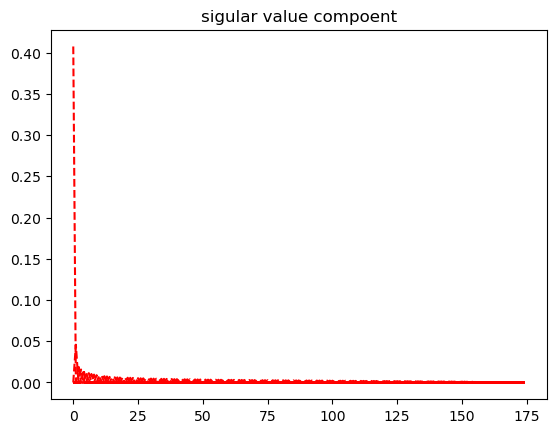

In [9]:
## plot sigular values ot tuncate
plt.plot(S[0:175,0:175]/sum,'r--')
plt.show
plt.title('sigular value compoent')

In [282]:
r = 170 ##truncate at 360
U=U[:,:r]
S=S[:r,:r]
VT=VT[:r,:]

In [283]:
## Transpose U to U* 
U = np.matrix(U)
S=np.matrix(S)
VT=np.matrix(VT)
UT = U.getH()
ST=S.getH()
V=VT.getH()
S.shape

(170, 170)

In [284]:
A=UT.dot(Y).dot(V).dot(ST)

In [100]:
A

(175, 175)

C:\Users\yifan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

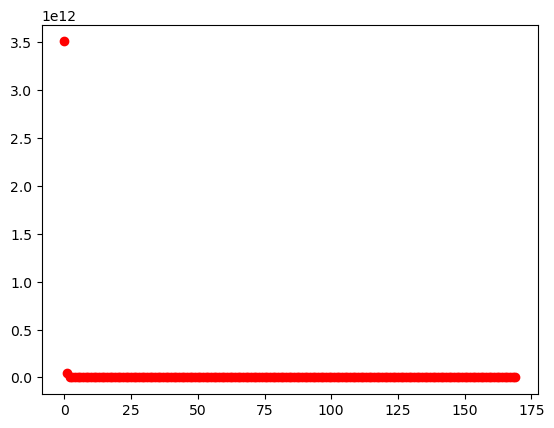

In [285]:
## eigen value and eigen vector of A tidle
eva,evc=np.linalg.eig(A)
plt.plot(eva,"ro")
plt.show

In [182]:
mu = np.diag(eva)
mu1=np.diag(np.real(eva))
mu2=np.diag(np.imag(eva))

In [203]:
dt = 
omega = np.log(mu)/2
omega2 = np.abs(np.log(mu)/2)
# plt.plot(omega2,'ro')
# plt.show()

C:\Users\yifan\AppData\Local\Temp\ipykernel_23516\2556060490.py:2: RuntimeWarning: divide by zero encountered in log
  omega = np.log(mu)/2
C:\Users\yifan\AppData\Local\Temp\ipykernel_23516\2556060490.py:2: RuntimeWarning: invalid value encountered in true_divide
  omega = np.log(mu)/2
C:\Users\yifan\AppData\Local\Temp\ipykernel_23516\2556060490.py:3: RuntimeWarning: divide by zero encountered in log
  omega2 = np.abs(np.log(mu)/2)
C:\Users\yifan\AppData\Local\Temp\ipykernel_23516\2556060490.py:3: RuntimeWarning: invalid value encountered in true_divide
  omega2 = np.abs(np.log(mu)/2)


In [187]:
e=np.exp(omega)

In [127]:
phi=U.dot(evc)
phi.shape

(518400, 175)

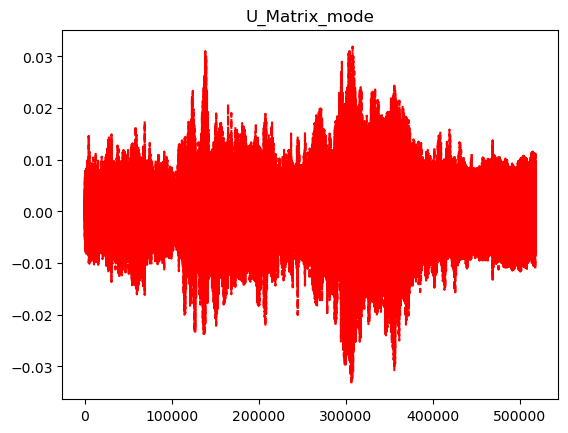

In [43]:
plt.plot(np.real(phi),'r--')
plt.title('U_Matrix_mode')
plt.show()

In [129]:
#initial condition
b=np.linalg.pinv(phi).dot(x[:,0:1])

matrix([[-9.74306392e+04+6.63139981e-15j],
        [ 8.85831364e+03-1.32196868e-11j],
        [ 7.74203304e+03+1.43994407e-11j],
        [ 1.85141279e+02-1.52599089e-11j],
        [ 5.45006374e+03+8.03831534e-12j],
        [-5.55965799e+02+4.33364754e-12j],
        [ 1.50845805e+03+1.62959187e+04j],
        [ 1.50845805e+03-1.62959187e+04j],
        [ 3.57564653e+03-6.60903085e-11j],
        [-1.29689425e+03-7.16504516e-11j],
        [-4.68437697e+02+7.23550888e+02j],
        [-4.68437697e+02-7.23550888e+02j],
        [-2.72583614e+03+1.08704900e-10j],
        [ 8.23197481e+03-1.84514150e-10j],
        [ 3.72317710e+02-4.69733347e+04j],
        [ 3.72317710e+02+4.69733347e+04j],
        [-5.66948261e+02-1.03310943e+02j],
        [-5.66948261e+02+1.03310943e+02j],
        [-2.00713158e+03+2.09009897e+02j],
        [-2.00713158e+03-2.09009897e+02j],
        [-2.69202377e+04+1.11028645e-11j],
        [ 2.46431685e+04-3.23361219e-11j],
        [-3.27940605e+02+5.62343670e+02j],
        [-3

In [177]:
b.shape

(175, 1)

In [51]:
org=phi.dot(time_dy)

(518400, 379)

In [273]:
df =pd.DataFrame(A[:,0:378])
df[0:]

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,3.507234e+12,-5.606924e+07,2.697083e+06,5.903453e+07,1.269207e+07,-1.104408e+06,-4.323633e+07,-1.789688e+07,2.305771e+07,1.051682e+07,...,-5.084144e+05,180093.498626,53671.539228,36586.379550,200608.933985,-13705.161820,11406.144233,68940.121621,-19602.549868,-29286.515912
1,-2.070578e+09,4.437777e+10,2.247280e+08,-8.708863e+05,-1.072340e+08,2.772723e+05,3.939296e+07,2.117580e+07,1.886521e+07,-4.896329e+06,...,-9.618514e+04,190245.054874,43528.405662,-35540.437808,-373120.715808,427800.612555,5507.506444,-96878.702785,-34788.487508,19583.818556
2,-7.699932e+08,-2.835770e+08,9.584643e+09,2.295731e+08,2.710623e+07,7.859804e+07,-8.588260e+07,-1.641237e+07,2.631382e+07,-3.195380e+07,...,-1.336294e+05,705849.308572,111106.060594,156546.490387,267603.695485,-142268.271388,-218497.687986,73236.774089,183898.962363,346913.587685
3,-4.926001e+08,6.491745e+06,-2.596654e+08,5.187733e+09,-1.168320e+08,1.620663e+07,1.064203e+08,3.214022e+06,1.438131e+07,-1.533820e+08,...,1.581901e+06,187148.246742,-26859.402898,46880.261926,126388.017373,-248013.588418,-414419.027394,-312923.895890,45153.780052,141157.199447
4,-4.516596e+08,8.052615e+07,-5.872783e+07,1.158653e+08,4.955814e+09,-9.198810e+07,-5.498984e+07,-1.407357e+07,-4.539482e+07,1.544669e+07,...,-7.218833e+05,-414126.073576,-129795.414753,-52770.036231,24032.797081,-198475.112648,85760.341579,486110.469224,-120685.715893,-307203.313576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,-2.775014e+06,6.592418e+05,1.857524e+05,-3.777832e+05,-1.342367e+05,1.358451e+04,3.912529e+05,6.948658e+05,-4.305623e+05,-4.251893e+05,...,-5.977045e+02,-215.159827,-1527.264169,-784.250440,-3280.293229,-26702.066823,621.648207,-1043.121926,-645.211708,213.258267
166,2.951652e+06,-3.207594e+05,1.560885e+03,-1.485016e+05,9.922318e+04,-5.327927e+04,-1.102227e+05,2.362298e+05,-1.140789e+05,1.444719e+04,...,1.748852e+03,1825.983719,1303.369535,364.154223,953.865571,-616.854347,-21239.186780,1514.182981,65.217178,-562.257464
167,3.161817e+06,-3.927474e+05,-2.909879e+04,-1.644371e+05,3.145771e+05,-1.220778e+05,-3.267531e+05,4.748419e+05,-2.066308e+05,-2.704893e+05,...,1.063689e+03,-3362.175779,1030.576820,669.008070,106.894194,-320.304054,1777.176448,-16445.919557,255.474231,286.885248
168,-1.438478e+06,1.698739e+05,8.528083e+04,9.229775e+04,4.620078e+01,3.746144e+04,-8.549675e+04,-3.443798e+04,3.293967e+04,-7.496843e+04,...,-1.920139e+03,-2025.547223,2745.406264,255.916319,585.753084,-401.296785,110.444347,1697.527170,-25406.537832,1916.557672
